In [13]:
# importing relevant libraries
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
from math import sqrt


In [14]:
def compute_mse_binomial_vs_normal(n_values, p):
    mse_binomial_vs_normal = {}

    for n in n_values:
        # binomial distribution
        k = np.arange(0, n + 1)
        binomial_pmf = binom.pmf(k, n, p)

        # normal distribution
        mu = n * p  # mean of the normal distribution approximation
        sigma = np.sqrt(n * p * (1 - p))  # standard deviation of the normal distribution approximation
        normal_pdf = norm.pdf(k, mu, sigma)

        # compute mse between the binomial and normal distribution
        mse = np.mean((binomial_pmf - normal_pdf) ** 2)
        mse_binomial_vs_normal[n] = mse

    return mse_binomial_vs_normal

In [15]:
def plot_mse_binomial_vs_normal(n_values, mse_binomial_vs_normal):
    plt.figure(figsize=(10, 6))

    # plot the MSE between binomial and normal
    mse_binomial_vs_normal_values = [mse_binomial_vs_normal[n] for n in n_values]
    plt.plot(n_values, mse_binomial_vs_normal_values, label='MSE (Binomial vs Normal)', color='green', marker='s', linestyle='-')

    # adding labels, title, and grid
    plt.title('MSE between Binomial PMF and Normal PDF')
    plt.xlabel('n (Number of levels)')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()


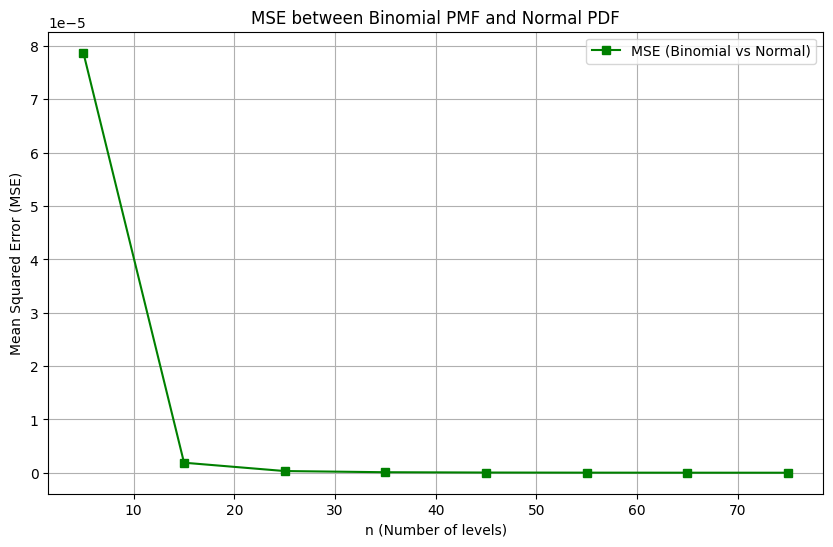

In [16]:
# parameters for the mse calculations
p = 0.5  # probability for binomial distribution (left/right)
n_values = range(5, 76, 10)  # values of n from 5 to 75 in steps of 10

# compute mse between binomial and normal distributions directly
mse_binomial_vs_normal = compute_mse_binomial_vs_normal(n_values, p)

# plot scatter and mean mse for each n, including binomial vs normal mse
plot_mse_binomial_vs_normal(n_values, mse_binomial_vs_normal)
